<a href="https://colab.research.google.com/github/choiws777/test/blob/master/CNA6_day2_2_wws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# <center>멤버십 고객 탈회 예측</center>

컬럼 | 설명 | 컬럼 | 설명
---|---|---|---
id | 멤버십 번호 | MEMBERSHIP_TERM_YEARS | 멤버십 기간
ANNUAL_FEES | 연간 회비 | MEMBER_MARITAL_STATUS | 기혼 여부, M(기혼), S(미혼)
MEMBER_GENDER | 성별, M(남),F(여) | MEMBER_ANNUAL_INCOME | 연봉(연간 수입)
MEMBER_OCCUPATION_CD | 직업 | MEMBERSHIP_PACKAGE | 멤버십 유형
MEMBER_AGE_AT_ISSUE | 나이 | ADDITIONAL_MEMBERS | 가족 회원의 수
PAYMENT_MODE | 지불 방식 | AGENT_CODE | 직원 코드 
START_DATE (YYYYMMDD) | 시작 날짜 | END_DATE  (YYYYMMDD) | 종료 날짜 
MEMBERSHIP_STATUS | 0(유지), 1(탈회) | 

In [ ]:
# 이 과제에서는 F1 스코어를 쓸거니 잘 보삼

# Import Library

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# 데이터셋 업로드

In [ ]:
# 구글 드라이브 연결하기
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


# Load Dataset

In [ ]:
train = pd.read_csv("/content/MyDrive/MyDrive/membership/train.csv")
print(train.shape)
train.head()

(8807, 15)


,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,NaN
1,1,88,149029.58,NaN,M,NaN,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014,NaN
2,2,93,102999.94,NaN,M,600000.0,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531,NaN
3,3,17,147576.48,M,F,450000.0,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331,NaN
4,4,39,100000.00,M,M,600000.0,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313,NaN


In [ ]:
test = pd.read_csv("/content/MyDrive/MyDrive/membership/test.csv")
print(test.shape)
test.head()

(1555, 13)


,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,START_DATE
0,8807,12,100000.00,M,F,999996.0,1.0,TYPE-B,41,1,ANNUAL,944999,20100331
1,8808,50,100000.00,M,M,399996.0,1.0,TYPE-B,34,2,SEMI-ANNUAL,546366,20090331
2,8809,12,100000.00,M,M,1200000.0,1.0,TYPE-B,36,3,ANNUAL,1207933,20120316
3,8810,12,250000.00,NaN,M,799992.0,2.0,TYPE-B,60,0,ANNUAL,1267000,20120327
4,8811,17,200000.24,NaN,M,1999992.0,2.0,TYPE-A,55,0,ANNUAL,923455,20130330


In [ ]:
submission = pd.read_csv("/content/MyDrive/MyDrive/membership/sample_submission.csv")
submission.head()

,id,MEMBERSHIP_STATUS
0,8807,0
1,8808,1
2,8809,0
3,8810,0
4,8811,1


# 데이터 탐색 (EDA)

### 데이터프레임 기본 정보

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     8807 non-null   int64  
 1   MEMBERSHIP_TERM_YEARS  8807 non-null   int64  
 2   ANNUAL_FEES            8807 non-null   float64
 3   MEMBER_MARITAL_STATUS  6597 non-null   object 
 4   MEMBER_GENDER          8305 non-null   object 
 5   MEMBER_ANNUAL_INCOME   7338 non-null   float64
 6   MEMBER_OCCUPATION_CD   8773 non-null   float64
 7   MEMBERSHIP_PACKAGE     8807 non-null   object 
 8   MEMBER_AGE_AT_ISSUE    8807 non-null   int64  
 9   ADDITIONAL_MEMBERS     8807 non-null   int64  
 10  PAYMENT_MODE           8807 non-null   object 
 11  AGENT_CODE             8807 non-null   object 
 12  MEMBERSHIP_STATUS      8807 non-null   int64  
 13  START_DATE             8807 non-null   int64  
 14  END_DATE               2671 non-null   float64
dtypes: f

### 통계정보 요약

In [ ]:
train.describe()

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,MEMBERSHIP_STATUS,START_DATE,END_DATE
count,8807.000000,8807.000000,8.807000e+03,7.338000e+03,8773.000000,8807.000000,8807.000000,8807.000000,8.807000e+03,2.671000e+03
mean,4403.000000,29.518451,1.806998e+05,1.375036e+06,1.711159,46.766322,1.412967,0.303281,2.010835e+07,2.011390e+07
std,2542.506244,22.584187,2.854986e+05,1.499773e+07,1.449801,13.909048,1.146395,0.459702,1.727042e+04,1.395780e+04
min,0.000000,9.000000,0.000000e+00,9.996000e+03,1.000000,0.000000,0.000000,0.000000,2.006091e+07,2.007083e+07
25%,2201.500000,12.000000,1.000000e+05,3.999960e+05,1.000000,37.000000,0.000000,0.000000,2.009123e+07,2.010121e+07
50%,4403.000000,19.000000,1.191941e+05,5.499960e+05,1.000000,46.000000,1.000000,0.000000,2.011011e+07,2.011121e+07
75%,6604.500000,37.000000,1.909890e+05,9.999960e+05,2.000000,57.000000,2.000000,1.000000,2.012123e+07,2.013020e+07
max,8806.000000,102.000000,1.010000e+07,1.000000e+09,6.000000,92.000000,3.000000,1.000000,2.013113e+07,2.013112e+07


### 중복행 개수

In [ ]:
train.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

### 결측치 개수

In [ ]:
train.isnull().sum()

id                          0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2210
MEMBER_GENDER             502
MEMBER_ANNUAL_INCOME     1469
MEMBER_OCCUPATION_CD       34
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE                  0
END_DATE                 6136
dtype: int64

In [ ]:
test.isnull().sum()

id                         0
MEMBERSHIP_TERM_YEARS      0
ANNUAL_FEES                0
MEMBER_MARITAL_STATUS    387
MEMBER_GENDER            109
MEMBER_ANNUAL_INCOME     285
MEMBER_OCCUPATION_CD       9
MEMBERSHIP_PACKAGE         0
MEMBER_AGE_AT_ISSUE        0
ADDITIONAL_MEMBERS         0
PAYMENT_MODE               0
AGENT_CODE                 0
START_DATE                 0
dtype: int64

# Preprocessing

## 컬럼명을 간결하게 바꾸기

In [ ]:
train

,id,MEMBERSHIP_TERM_YEARS,ANNUAL_FEES,MEMBER_MARITAL_STATUS,MEMBER_GENDER,MEMBER_ANNUAL_INCOME,MEMBER_OCCUPATION_CD,MEMBERSHIP_PACKAGE,MEMBER_AGE_AT_ISSUE,ADDITIONAL_MEMBERS,PAYMENT_MODE,AGENT_CODE,MEMBERSHIP_STATUS,START_DATE,END_DATE
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029,NaN
1,1,88,149029.58,NaN,M,NaN,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014,NaN
2,2,93,102999.94,NaN,M,600000.0,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531,NaN
3,3,17,147576.48,M,F,450000.0,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331,NaN
4,4,39,100000.00,M,M,600000.0,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8802,17,100000.00,NaN,NaN,NaN,1.0,TYPE-B,53,0,ANNUAL,744188,0,20100115,NaN
8803,8803,49,100000.00,M,M,399996.0,1.0,TYPE-B,46,1,ANNUAL,841477,0,20100208,NaN
8804,8804,54,600001.16,M,M,2250000.0,2.0,TYPE-A,51,3,ANNUAL,1347855,0,20130331,NaN
8805,8805,27,100000.00,M,M,600000.0,1.0,TYPE-B,27,2,ANNUAL,798833,0,20100127,NaN


In [ ]:
train.columns

Index(['id', 'MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_MARITAL_STATUS',
       'MEMBER_GENDER', 'MEMBER_ANNUAL_INCOME', 'MEMBER_OCCUPATION_CD',
       'MEMBERSHIP_PACKAGE', 'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS',
       'PAYMENT_MODE', 'AGENT_CODE', 'MEMBERSHIP_STATUS', 'START_DATE',
       'END_DATE'],
      dtype='object')

In [ ]:
train.columns = ['id', 'term', 'fee', 'married', 'gender', 'income', 'job',
'package', 'age', 'family', 'payment', 'agent', 'target', 'stard_date', 'end_date']

In [ ]:
test.columns

Index(['id', 'term', 'fee', 'married', 'gender', 'income', 'job', 'package',
       'age', 'family', 'payment', 'agent', 'stard_date'],
      dtype='object')

In [ ]:
test.columns = ['id', 'term', 'fee', 'married', 'gender', 'income', 'job',
'package', 'age', 'family', 'payment', 'agent', 'stard_date']

In [ ]:
test.head()

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,stard_date
0,8807,12,100000.00,M,F,999996.0,1.0,TYPE-B,41,1,ANNUAL,944999,20100331
1,8808,50,100000.00,M,M,399996.0,1.0,TYPE-B,34,2,SEMI-ANNUAL,546366,20090331
2,8809,12,100000.00,M,M,1200000.0,1.0,TYPE-B,36,3,ANNUAL,1207933,20120316
3,8810,12,250000.00,NaN,M,799992.0,2.0,TYPE-B,60,0,ANNUAL,1267000,20120327
4,8811,17,200000.24,NaN,M,1999992.0,2.0,TYPE-A,55,0,ANNUAL,923455,20130330


In [ ]:
sns.countplot(x='package' , hue='target' , data=train)

In [ ]:
sns.displot(x='age'  , data=train)

In [ ]:
sns.displot(x='age'  , hue='target' ,  data=train)

In [ ]:
sns.displot(x='age'  , hue='target' , kind='kde' , fill=True , data=train)

In [ ]:
sns.displot(x='age'  , kind='kde' , fill=True , data=test)

## 결측값 처리

In [ ]:
train.isnull().sum()

id               0
term             0
fee              0
married       2210
gender         502
income        1469
job             34
package          0
age              0
family           0
payment          0
agent            0
target           0
stard_date       0
end_date      6136
dtype: int64

In [ ]:
test.isnull().sum()

id              0
term            0
fee             0
married       387
gender        109
income        285
job             9
package         0
age             0
family          0
payment         0
agent           0
stard_date      0
dtype: int64

### 결측값 제거

In [ ]:
# end_date 열 삭제  #원본에서 제거는 아님
train.drop(['end_date'], axis=1)

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,stard_date
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029
1,1,88,149029.58,NaN,M,NaN,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014
2,2,93,102999.94,NaN,M,600000.0,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531
3,3,17,147576.48,M,F,450000.0,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331
4,4,39,100000.00,M,M,600000.0,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8802,17,100000.00,NaN,NaN,NaN,1.0,TYPE-B,53,0,ANNUAL,744188,0,20100115
8803,8803,49,100000.00,M,M,399996.0,1.0,TYPE-B,46,1,ANNUAL,841477,0,20100208
8804,8804,54,600001.16,M,M,2250000.0,2.0,TYPE-A,51,3,ANNUAL,1347855,0,20130331
8805,8805,27,100000.00,M,M,600000.0,1.0,TYPE-B,27,2,ANNUAL,798833,0,20100127


In [ ]:
train = train.drop(['end_date'], axis=1)
#삭제처리한 사본을 저장하는 방법이 주로 권장

In [ ]:
# train.drop(['end_date'], axis=1, inplace=True)  #실제 원본 데이터에 삭제 바로 반영

In [ ]:
train = train.drop(['end_date' ,'married' ], axis=1)

### 평균값 대체

In [ ]:
train.isnull().sum()

id               0
term             0
fee              0
married       2210
gender         502
income        1469
job             34
package          0
age              0
family           0
payment          0
agent            0
target           0
stard_date       0
dtype: int64

In [ ]:
# income
train['income'].mean()

1375036.0850367947

In [ ]:
train

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,stard_date
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029
1,1,88,149029.58,NaN,M,NaN,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014
2,2,93,102999.94,NaN,M,600000.0,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531
3,3,17,147576.48,M,F,450000.0,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331
4,4,39,100000.00,M,M,600000.0,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8802,17,100000.00,NaN,NaN,NaN,1.0,TYPE-B,53,0,ANNUAL,744188,0,20100115
8803,8803,49,100000.00,M,M,399996.0,1.0,TYPE-B,46,1,ANNUAL,841477,0,20100208
8804,8804,54,600001.16,M,M,2250000.0,2.0,TYPE-A,51,3,ANNUAL,1347855,0,20130331
8805,8805,27,100000.00,M,M,600000.0,1.0,TYPE-B,27,2,ANNUAL,798833,0,20100127


In [ ]:
train['income'] = train['income'].fillna(train['income'].mean())

In [ ]:
income_mean = train['income'].mean()
train['income'] = train['income'].fillna(income_mean)    #기준은 train data로 낮춘다
test['income'] = test['income'].fillna(income_mean)

In [ ]:
sns.displot(x='income', hue='target', data=train, palette="PRGn");

### 최빈값 대체

In [ ]:
train.isnull().sum()

id               0
term             0
fee              0
married       2210
gender         502
income           0
job             34
package          0
age              0
family           0
payment          0
agent            0
target           0
stard_date       0
dtype: int64

In [ ]:
train.isnull().sum()

id               0
term             0
fee              0
married       2210
gender         502
income           0
job             34
package          0
age              0
family           0
payment          0
agent            0
target           0
stard_date       0
dtype: int64

In [ ]:
train['gender'].value_counts(dropna=False)

M      6249
F      2056
NaN     502
Name: gender, dtype: int64

In [ ]:
train['income'].value_counts(dropna=False)

1.375036e+06    1469
3.999960e+05     518
9.999960e+05     512
3.000000e+05     489
6.000000e+05     458
                ... 
1.535520e+05       1
1.323533e+07       1
6.469920e+05       1
2.150004e+06       1
1.015776e+06       1
Name: income, Length: 720, dtype: int64

In [ ]:
train['gender'].value_counts(dropna=False).index
#train['gender'].value_counts(dropna=False).index[0]

Index(['M', 'F', nan], dtype='object')

In [ ]:
train['income'].value_counts(dropna=False).index
#train['gender'].value_counts(dropna=False).index[0]

Float64Index([1375036.0850367947,           399996.0,           999996.0,
                        300000.0,           600000.0,           499992.0,
                        500004.0,           699996.0,           799992.0,
                        450000.0,
              ...
                        696000.0,           244992.0,          1130004.0,
                        642000.0,          1851000.0,           153552.0,
                      13235328.0,           646992.0,          2150004.0,
                       1015776.0],
             dtype='float64', length=720)

In [ ]:
# gender
train['gender'].mode()

0    M
dtype: object

In [ ]:
# income
train['income'].mode()

0    1.375036e+06
dtype: float64

In [ ]:
# gender
train['gender'].mode()[0]

'M'

In [ ]:
# income
train['income'].mode()[0]

1375036.0850367947

In [ ]:
train['gender'] = train['gender'].fillna(train['gender'].mode()[0])
test['gender'] = test['gender'].fillna(train['gender'].mode()[0])

In [ ]:
train['income'] = train['income'].fillna(train['income'].mode()[0])
test['income'] = test['income'].fillna(train['income'].mode()[0])

In [ ]:
test['gender']

0       F
1       M
2       M
3       M
4       M
       ..
1550    M
1551    F
1552    M
1553    F
1554    F
Name: gender, Length: 1555, dtype: object

In [ ]:
test['income']

0       9.999960e+05
1       3.999960e+05
2       1.200000e+06
3       7.999920e+05
4       1.999992e+06
            ...     
1550    1.375036e+06
1551    1.500000e+06
1552    2.460000e+06
1553    3.999960e+05
1554    9.999600e+04
Name: income, Length: 1555, dtype: float64

In [ ]:
sns.countplot(x='gender', hue='target', data=train);

In [ ]:
test.isnull().sum()

id              0
term            0
fee             0
married       387
gender          0
income          0
job             9
package         0
age             0
family          0
payment         0
agent           0
stard_date      0
dtype: int64

In [ ]:
test.head()

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,stard_date
0,8807,12,100000.00,M,F,999996.0,1.0,TYPE-B,41,1,ANNUAL,944999,20100331
1,8808,50,100000.00,M,M,399996.0,1.0,TYPE-B,34,2,SEMI-ANNUAL,546366,20090331
2,8809,12,100000.00,M,M,1200000.0,1.0,TYPE-B,36,3,ANNUAL,1207933,20120316
3,8810,12,250000.00,NaN,M,799992.0,2.0,TYPE-B,60,0,ANNUAL,1267000,20120327
4,8811,17,200000.24,NaN,M,1999992.0,2.0,TYPE-A,55,0,ANNUAL,923455,20130330


### 결측값을 별도로 표시

In [ ]:
# married
train['married'].value_counts(dropna=False)

M      5455
NaN    2210
S       977
W       128
D        37
Name: married, dtype: int64

In [ ]:
# 결측을 하나의 범주로 취급해버리기 U
train['married'] = train['married'].fillna('U')
test['married'] = test['married'].fillna('U')

In [ ]:
sns.countplot(x='married', hue='target', data=train);

In [ ]:
sns.countplot(x='married', hue='job', data=train);

# [실습]
married, job 컬럼에 속하는 결측값을 적절하게 처리합니다. 

In [ ]:
test.isnull().sum()

id            0
term          0
fee           0
married       0
gender        0
income        0
job           9
package       0
age           0
family        0
payment       0
agent         0
stard_date    0
dtype: int64

In [ ]:
train['gender'].value_counts(dropna=False).index[0]

'M'

In [ ]:
# job
train['job'].value_counts(dropna=False)

1.0    6169
2.0    1537
6.0     613
5.0     276
4.0     177
NaN      34
3.0       1
Name: job, dtype: int64

In [ ]:
train['job'] = train['job'].fillna(train['job'].mode()[0])
test['job'] = test['job'].fillna(train['job'].mode()[0])

In [ ]:
# married
train['married'].value_counts(dropna=False)

M    5455
U    2210
S     977
W     128
D      37
Name: married, dtype: int64

In [ ]:
train['married'] = train['married'].fillna(train['married'].mode()[0])
test['married'] = test['married'].fillna(train['married'].mode()[0])

In [ ]:
test.isnull().sum()

id            0
term          0
fee           0
married       0
gender        0
income        0
job           0
package       0
age           0
family        0
payment       0
agent         0
stard_date    0
dtype: int64

In [ ]:
train.isnull().sum()

id            0
term          0
fee           0
married       0
gender        0
income        0
job           0
package       0
age           0
family        0
payment       0
agent         0
target        0
stard_date    0
dtype: int64

In [ ]:
train.head()

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,stard_date
0,0,22,100000.00,M,M,450000.0,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029
1,1,88,149029.58,U,M,399996.0,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014
2,2,93,102999.94,U,M,600000.0,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531
3,3,17,147576.48,M,F,450000.0,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331
4,4,39,100000.00,M,M,600000.0,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8807 non-null   int64  
 1   term        8807 non-null   int64  
 2   fee         8807 non-null   float64
 3   married     8807 non-null   object 
 4   gender      8807 non-null   object 
 5   income      8807 non-null   float64
 6   job         8807 non-null   float64
 7   package     8807 non-null   object 
 8   age         8807 non-null   int64  
 9   family      8807 non-null   int64  
 10  payment     8807 non-null   object 
 11  agent       8807 non-null   object 
 12  target      8807 non-null   int64  
 13  stard_date  8807 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 963.4+ KB


## Label Encoding

In [ ]:
for col in train.columns:
    print(train[col].dtype)

int64
int64
float64
object
object
float64
float64
object
int64
int64
object
object
int64
int64


In [ ]:
for col in train.columns:
    if train[col].dtype == 'object':
        print(col)

married
gender
package
payment
agent


In [ ]:
categorical_features = [col for col in train.columns if train[col].dtype=='object']

In [ ]:
# 범주형 변수
categorical_features = []
for col in train.columns:
    if train[col].dtype == 'O':
        categorical_features.append(col)
        
categorical_features

['married', 'gender', 'package', 'payment', 'agent']

### gender

In [ ]:
train['gender'].value_counts()

M    6751
F    2056
Name: gender, dtype: int64

In [ ]:
train['gender'] =='M'

0        True
1        True
2        True
3       False
4        True
        ...  
8802     True
8803     True
8804     True
8805     True
8806     True
Name: gender, Length: 8807, dtype: bool

In [ ]:
# Label Encoding
train.loc[train['gender']=='M', 'gender'] = 0
train.loc[train['gender']=='F', 'gender'] = 1

test.loc[test['gender']=='M', 'gender'] = 0
test.loc[test['gender']=='F', 'gender'] = 1

train['gender'].value_counts()

0    6751
1    2056
Name: gender, dtype: int64

In [ ]:
train.head()

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,stard_date
0,0,22,100000.00,M,0,4.500000e+05,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029
1,1,88,149029.58,U,0,1.375036e+06,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014
2,2,93,102999.94,U,0,6.000000e+05,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531
3,3,17,147576.48,M,1,4.500000e+05,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331
4,4,39,100000.00,M,0,6.000000e+05,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313


### married

In [ ]:
train['married'].value_counts(dropna=False)

M    5455
U    2210
S     977
W     128
D      37
Name: married, dtype: int64

In [ ]:
# Label Encoder 활용
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train['married'])
train['married'] = encoder.transform(train['married'])
test['married'] = encoder.transform(test['married'])

train['married'].value_counts()

1    5455
3    2210
2     977
4     128
0      37
Name: married, dtype: int64

In [ ]:
train.head()

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,stard_date
0,0,22,100000.00,1,0,4.500000e+05,1.0,TYPE-B,27,1,ANNUAL,666099,0,20091029
1,1,88,149029.58,3,0,1.375036e+06,6.0,TYPE-A,75,0,ANNUAL,132000,0,20131014
2,2,93,102999.94,3,0,6.000000e+05,1.0,TYPE-A,49,0,ANNUAL,1407177,0,20130531
3,3,17,147576.48,1,1,4.500000e+05,1.0,TYPE-A,47,3,MONTHLY,343344,0,20130331
4,4,39,100000.00,1,0,6.000000e+05,1.0,TYPE-B,36,3,ANNUAL,119199,0,20080313


In [ ]:
train['gender'] = train['gender'].astype(int)

In [ ]:
train['package'] = train['package'].astype(int)

ValueError: ignored

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8807 non-null   int64  
 1   term        8807 non-null   int64  
 2   fee         8807 non-null   float64
 3   married     8807 non-null   int64  
 4   gender      8807 non-null   int64  
 5   income      8807 non-null   float64
 6   job         8807 non-null   float64
 7   package     8807 non-null   object 
 8   age         8807 non-null   int64  
 9   family      8807 non-null   int64  
 10  payment     8807 non-null   object 
 11  agent       8807 non-null   object 
 12  target      8807 non-null   int64  
 13  stard_date  8807 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 963.4+ KB


## [Quiz]
package 변수의 범주형 자료를 Label Encoding 기법을 적용하여 숫자로 변환합니다. 

In [ ]:
train['package'].value_counts()

TYPE-B    5744
TYPE-A    3063
Name: package, dtype: int64

In [ ]:
## 아래  transform 스삼!! object에서 안변한다 이렇게하면
# Label Encoding
train.loc[train['package']=='TYPE-A', 'package'] = 0
train.loc[train['package']=='TYPE-B', 'package'] = 1

test.loc[test['package']=='TYPE-A', 'package'] = 0
test.loc[test['package']=='TYPE-B', 'package'] = 1

train['package'].value_counts()

1    5744
0    3063
Name: package, dtype: int64

In [ ]:
# Label Encoder 활용
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train['package'])
train['package'] = encoder.transform(train['package'])
test['package'] = encoder.transform(test['package'])

train['package'].value_counts()

1    5744
0    3063
Name: package, dtype: int64

In [ ]:
print(encoder.classes_)

['TYPE-A' 'TYPE-B']


In [ ]:
train.head()

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,stard_date
0,0,22,100000.00,1,0,4.500000e+05,1.0,1,27,1,ANNUAL,666099,0,20091029
1,1,88,149029.58,3,0,1.375036e+06,6.0,0,75,0,ANNUAL,132000,0,20131014
2,2,93,102999.94,3,0,6.000000e+05,1.0,0,49,0,ANNUAL,1407177,0,20130531
3,3,17,147576.48,1,1,4.500000e+05,1.0,0,47,3,MONTHLY,343344,0,20130331
4,4,39,100000.00,1,0,6.000000e+05,1.0,1,36,3,ANNUAL,119199,0,20080313


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8807 non-null   int64  
 1   term        8807 non-null   int64  
 2   fee         8807 non-null   float64
 3   married     8807 non-null   int64  
 4   gender      8807 non-null   int64  
 5   income      8807 non-null   float64
 6   job         8807 non-null   float64
 7   package     8807 non-null   int64  
 8   age         8807 non-null   int64  
 9   family      8807 non-null   int64  
 10  payment     8807 non-null   object 
 11  agent       8807 non-null   object 
 12  target      8807 non-null   int64  
 13  stard_date  8807 non-null   int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 963.4+ KB


In [ ]:
#train['gender'].astype(str)


In [ ]:
train['gender'] = train['gender'].astype(int)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8807 non-null   int64  
 1   term        8807 non-null   int64  
 2   fee         8807 non-null   float64
 3   married     8807 non-null   int64  
 4   gender      8807 non-null   int64  
 5   income      8807 non-null   float64
 6   job         8807 non-null   float64
 7   package     8807 non-null   int64  
 8   age         8807 non-null   int64  
 9   family      8807 non-null   int64  
 10  payment     8807 non-null   object 
 11  agent       8807 non-null   object 
 12  target      8807 non-null   int64  
 13  stard_date  8807 non-null   int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 963.4+ KB


## One-hot Encoding

In [ ]:
# One-Hot Encoding

pd.get_dummies(train, columns = ['payment'], drop_first=False)

,id,term,fee,married,gender,income,job,package,age,family,agent,target,stard_date,payment_ANNUAL,payment_MONTHLY,payment_QUARTERLY,payment_SEMI-ANNUAL,payment_SINGLE-PREMIUM
0,0,22,100000.00,1,0,4.500000e+05,1.0,1,27,1,666099,0,20091029,1,0,0,0,0
1,1,88,149029.58,3,0,1.375036e+06,6.0,0,75,0,132000,0,20131014,1,0,0,0,0
2,2,93,102999.94,3,0,6.000000e+05,1.0,0,49,0,1407177,0,20130531,1,0,0,0,0
3,3,17,147576.48,1,1,4.500000e+05,1.0,0,47,3,343344,0,20130331,0,1,0,0,0
4,4,39,100000.00,1,0,6.000000e+05,1.0,1,36,3,119199,0,20080313,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8802,17,100000.00,3,0,1.375036e+06,1.0,1,53,0,744188,0,20100115,1,0,0,0,0
8803,8803,49,100000.00,1,0,3.999960e+05,1.0,1,46,1,841477,0,20100208,1,0,0,0,0
8804,8804,54,600001.16,1,0,2.250000e+06,2.0,0,51,3,1347855,0,20130331,1,0,0,0,0
8805,8805,27,100000.00,1,0,6.000000e+05,1.0,1,27,2,798833,0,20100127,1,0,0,0,0


In [ ]:
pd.get_dummies(train, columns = ['payment'], drop_first=True)

,id,term,fee,married,gender,income,job,package,age,family,agent,target,stard_date,payment_MONTHLY,payment_QUARTERLY,payment_SEMI-ANNUAL,payment_SINGLE-PREMIUM
0,0,22,100000.00,1,0,4.500000e+05,1.0,1,27,1,666099,0,20091029,0,0,0,0
1,1,88,149029.58,3,0,1.375036e+06,6.0,0,75,0,132000,0,20131014,0,0,0,0
2,2,93,102999.94,3,0,6.000000e+05,1.0,0,49,0,1407177,0,20130531,0,0,0,0
3,3,17,147576.48,1,1,4.500000e+05,1.0,0,47,3,343344,0,20130331,1,0,0,0
4,4,39,100000.00,1,0,6.000000e+05,1.0,1,36,3,119199,0,20080313,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8802,17,100000.00,3,0,1.375036e+06,1.0,1,53,0,744188,0,20100115,0,0,0,0
8803,8803,49,100000.00,1,0,3.999960e+05,1.0,1,46,1,841477,0,20100208,0,0,0,0
8804,8804,54,600001.16,1,0,2.250000e+06,2.0,0,51,3,1347855,0,20130331,0,0,0,0
8805,8805,27,100000.00,1,0,6.000000e+05,1.0,1,27,2,798833,0,20100127,0,0,0,0


In [ ]:
# train, test 결합 
data = train.append(test)
data

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,stard_date
0,0,22,100000.00,1,0,4.500000e+05,1.0,1,27,1,ANNUAL,666099,0.0,20091029
1,1,88,149029.58,3,0,1.375036e+06,6.0,0,75,0,ANNUAL,132000,0.0,20131014
2,2,93,102999.94,3,0,6.000000e+05,1.0,0,49,0,ANNUAL,1407177,0.0,20130531
3,3,17,147576.48,1,1,4.500000e+05,1.0,0,47,3,MONTHLY,343344,0.0,20130331
4,4,39,100000.00,1,0,6.000000e+05,1.0,1,36,3,ANNUAL,119199,0.0,20080313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,10357,79,168500.24,3,0,1.375036e+06,6.0,0,62,0,ANNUAL,1157900,NaN,20121231
1551,10358,12,200000.00,1,1,1.500000e+06,1.0,1,41,3,ANNUAL,867622,NaN,20110310
1552,10359,101,233154.49,3,0,2.460000e+06,1.0,0,33,0,ANNUAL,1120355,NaN,20110620
1553,10360,12,100000.00,1,1,3.999960e+05,1.0,1,38,1,ANNUAL,174766,NaN,20080205


In [ ]:
data = pd.get_dummies(data, columns = ['payment'], drop_first=True)
data

,id,term,fee,married,gender,income,job,package,age,family,agent,target,stard_date,payment_MONTHLY,payment_QUARTERLY,payment_SEMI-ANNUAL,payment_SINGLE-PREMIUM
0,0,22,100000.00,1,0,4.500000e+05,1.0,1,27,1,666099,0.0,20091029,0,0,0,0
1,1,88,149029.58,3,0,1.375036e+06,6.0,0,75,0,132000,0.0,20131014,0,0,0,0
2,2,93,102999.94,3,0,6.000000e+05,1.0,0,49,0,1407177,0.0,20130531,0,0,0,0
3,3,17,147576.48,1,1,4.500000e+05,1.0,0,47,3,343344,0.0,20130331,1,0,0,0
4,4,39,100000.00,1,0,6.000000e+05,1.0,1,36,3,119199,0.0,20080313,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,10357,79,168500.24,3,0,1.375036e+06,6.0,0,62,0,1157900,NaN,20121231,0,0,0,0
1551,10358,12,200000.00,1,1,1.500000e+06,1.0,1,41,3,867622,NaN,20110310,0,0,0,0
1552,10359,101,233154.49,3,0,2.460000e+06,1.0,0,33,0,1120355,NaN,20110620,0,0,0,0
1553,10360,12,100000.00,1,1,3.999960e+05,1.0,1,38,1,174766,NaN,20080205,0,0,0,0


In [ ]:
new_train = data[data['target'].notnull()]
new_test = data[data['target'].isnull()]

new_train.shape, new_test.shape

((8807, 17), (1555, 17))

In [ ]:
new_test

,id,term,fee,married,gender,income,job,package,age,family,agent,target,stard_date,payment_MONTHLY,payment_QUARTERLY,payment_SEMI-ANNUAL,payment_SINGLE-PREMIUM
0,8807,12,100000.00,1,1,9.999960e+05,1.0,1,41,1,944999,NaN,20100331,0,0,0,0
1,8808,50,100000.00,1,0,3.999960e+05,1.0,1,34,2,546366,NaN,20090331,0,0,1,0
2,8809,12,100000.00,1,0,1.200000e+06,1.0,1,36,3,1207933,NaN,20120316,0,0,0,0
3,8810,12,250000.00,3,0,7.999920e+05,2.0,1,60,0,1267000,NaN,20120327,0,0,0,0
4,8811,17,200000.24,3,0,1.999992e+06,2.0,0,55,0,923455,NaN,20130330,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,10357,79,168500.24,3,0,1.375036e+06,6.0,0,62,0,1157900,NaN,20121231,0,0,0,0
1551,10358,12,200000.00,1,1,1.500000e+06,1.0,1,41,3,867622,NaN,20110310,0,0,0,0
1552,10359,101,233154.49,3,0,2.460000e+06,1.0,0,33,0,1120355,NaN,20110620,0,0,0,0
1553,10360,12,100000.00,1,1,3.999960e+05,1.0,1,38,1,174766,NaN,20080205,0,0,0,0


## Binning

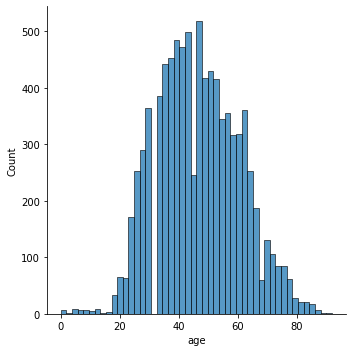

In [ ]:
# Age 분포
sns.displot(x='age', kind='hist', data=train);

In [ ]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 150]

In [ ]:
age_labels = ['10-', '20s', '30s', '40s', '50s', '60s', '70+']

In [ ]:
pd.cut(train['age'], bins=age_bins, labels=age_labels)

0       20s
1       70+
2       40s
3       40s
4       30s
       ... 
8802    50s
8803    40s
8804    50s
8805    20s
8806    40s
Name: age, Length: 8807, dtype: category
Categories (7, object): ['10-' < '20s' < '30s' < '40s' < '50s' < '60s' < '70+']

In [ ]:
train['age_bin'] = pd.cut(train['age'], bins=age_bins, labels=age_labels)
train['age_bin'].value_counts()

40s    2369
50s    1818
30s    1764
20s    1184
60s    1136
70+     434
10-      98
Name: age_bin, dtype: int64

In [ ]:
sns.countplot(x='age_bin', hue='target', data=train);

In [ ]:
test['age_bin'] = pd.cut(test['age'], bins=age_bins, labels=age_labels)
test['age_bin'].value_counts()

40s    413
30s    319
50s    316
60s    216
20s    199
70+     72
10-     20
Name: age_bin, dtype: int64

In [ ]:
sns.displot(x='age_bin', kind='hist', hue='target', data=train);

In [ ]:
sns.countplot(x='age_bin', hue='target', data=train);

## Feature interaction

In [ ]:
train["gender"].value_counts()

0    6751
1    2056
Name: gender, dtype: int64

In [ ]:
train["gender"].astype(str)

0       0
1       0
2       0
3       1
4       0
       ..
8802    0
8803    0
8804    0
8805    0
8806    0
Name: gender, Length: 8807, dtype: object

In [ ]:
train["age_bin"].astype(str) + '_' + train["gender"].astype(str)

0       20s_0
1       70+_0
2       40s_0
3       40s_1
4       30s_0
        ...  
8802    50s_0
8803    40s_0
8804    50s_0
8805    20s_0
8806    40s_0
Length: 8807, dtype: object

In [ ]:
# Age_Bin과 Gender 결합
train['age_gender'] = train["age_bin"].astype(str) + '_' + train["gender"].astype(str)
train['age_gender'].value_counts()

40s_0    1770
30s_0    1370
50s_0    1363
20s_0     926
60s_0     873
40s_1     599
50s_1     455
30s_1     394
70+_0     364
60s_1     263
20s_1     258
10-_0      81
70+_1      70
10-_1      17
nan_0       4
Name: age_gender, dtype: int64

In [ ]:
## 결측치 재확인해볼것

In [ ]:
train['age_bin'].value_counts(dropna=False)

40s    2369
50s    1818
30s    1764
20s    1184
60s    1136
70+     434
10-      98
NaN       4
Name: age_bin, dtype: int64

In [ ]:
train['age_bin'].value_counts(dropna=False).index

CategoricalIndex(['40s', '50s', '30s', '20s', '60s', '70+', '10-', nan], categories=['10-', '20s', '30s', '40s', '50s', '60s', '70+'], ordered=True, dtype='category')

In [ ]:
train['age_bin'].mode()

0    40s
Name: age_bin, dtype: category
Categories (7, object): ['10-' < '20s' < '30s' < '40s' < '50s' < '60s' < '70+']

In [ ]:
train['age_bin'].mode()[0]

'40s'

In [ ]:
train['age_bin'] = train['age_bin'].fillna(train['age_bin'].mode()[0])  
    test['age_bin'] = test['age_bin'].fillna(train['age_bin'].mode()[0])

SyntaxError: ignored

In [ ]:
train['age_bin'] = train['age_bin'].fillna('40s')
test['age_bin'] = test['age_bin'].fillna('40s')

In [ ]:
train.isnull().sum()

id            0
term          0
fee           0
married       0
gender        0
income        0
job           0
package       0
age           0
family        0
payment       0
agent         0
target        0
stard_date    0
age_bin       0
age_gender    0
dtype: int64

In [ ]:
train['age_bin']

0       20s
1       70+
2       40s
3       40s
4       30s
       ... 
8802    50s
8803    40s
8804    50s
8805    20s
8806    40s
Name: age_bin, Length: 8807, dtype: category
Categories (7, object): ['10-' < '20s' < '30s' < '40s' < '50s' < '60s' < '70+']

In [ ]:
test.isnull().sum()

id            0
term          0
fee           0
married       0
gender        0
income        0
job           0
package       0
age           0
family        0
payment       0
agent         0
stard_date    0
age_bin       0
dtype: int64

In [ ]:
sns.displot(x='age_gender', kind='hist', hue='target', data=train)
plt.xticks(rotation=90)
plt.show()

In [ ]:
test['age_gender'] = test["age_bin"].astype(str) + '_' + test["gender"].astype(str)
test['age_gender'].value_counts()

40s_0    314
30s_0    251
50s_0    233
60s_0    166
20s_0    153
40s_1     99
50s_1     83
30s_1     68
70+_0     57
60s_1     50
20s_1     46
10-_0     16
70+_1     15
10-_1      4
Name: age_gender, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          8807 non-null   int64   
 1   term        8807 non-null   int64   
 2   fee         8807 non-null   float64 
 3   married     8807 non-null   int64   
 4   gender      8807 non-null   int64   
 5   income      8807 non-null   float64 
 6   job         8807 non-null   float64 
 7   package     8807 non-null   int64   
 8   age         8807 non-null   int64   
 9   family      8807 non-null   int64   
 10  payment     8807 non-null   object  
 11  agent       8807 non-null   object  
 12  target      8807 non-null   int64   
 13  stard_date  8807 non-null   int64   
 14  age_bin     8807 non-null   category
 15  age_gender  8807 non-null   object  
dtypes: category(1), float64(3), int64(9), object(3)
memory usage: 1.0+ MB


## 로그 변환

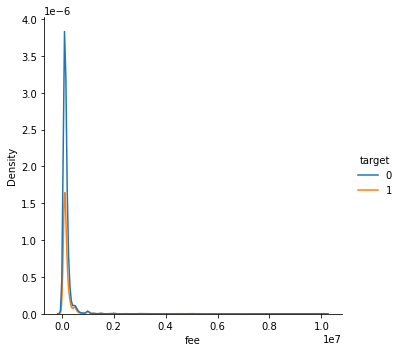

In [ ]:
# Annual_Premium 분포
sns.displot(x='fee', kind='kde', hue='target', data=train);

In [ ]:
# log 변환
train['fee_log'] = np.log1p(train['fee'])
train['fee_log']

0       11.512935
1       11.911907
2       11.542493
3       11.902109
4       11.512935
          ...    
8802    11.512935
8803    11.512935
8804    13.304689
8805    11.512935
8806    11.512943
Name: fee_log, Length: 8807, dtype: float64

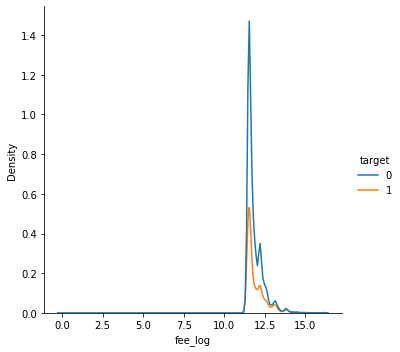

In [ ]:
sns.displot(x='fee_log', kind='kde', hue='target', data=train);

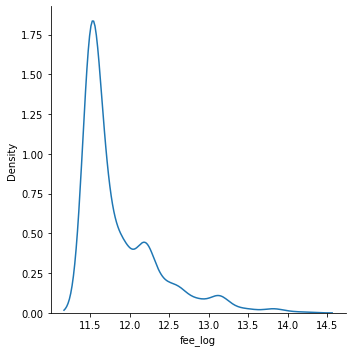

In [ ]:
test['fee_log'] = np.log1p(test['fee'])
sns.displot(x='fee_log', kind='kde', data=test);

# Baseline 모델

In [ ]:
train.head()

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,target,stard_date,age_bin,age_gender,fee_log
0,0,22,100000.00,1,0,4.500000e+05,1.0,1,27,1,ANNUAL,666099,0,20091029,20s,20s_0,11.512935
1,1,88,149029.58,3,0,1.375036e+06,6.0,0,75,0,ANNUAL,132000,0,20131014,70+,70+_0,11.911907
2,2,93,102999.94,3,0,6.000000e+05,1.0,0,49,0,ANNUAL,1407177,0,20130531,40s,40s_0,11.542493
3,3,17,147576.48,1,1,4.500000e+05,1.0,0,47,3,MONTHLY,343344,0,20130331,40s,40s_1,11.902109
4,4,39,100000.00,1,0,6.000000e+05,1.0,1,36,3,ANNUAL,119199,0,20080313,30s,30s_0,11.512935


In [ ]:
test.head()

,id,term,fee,married,gender,income,job,package,age,family,payment,agent,stard_date,age_bin,age_gender,fee_log
0,8807,12,100000.00,1,1,999996.0,1.0,1,41,1,ANNUAL,944999,20100331,40s,40s_1,11.512935
1,8808,50,100000.00,1,0,399996.0,1.0,1,34,2,SEMI-ANNUAL,546366,20090331,30s,30s_0,11.512935
2,8809,12,100000.00,1,0,1200000.0,1.0,1,36,3,ANNUAL,1207933,20120316,30s,30s_0,11.512935
3,8810,12,250000.00,3,0,799992.0,2.0,1,60,0,ANNUAL,1267000,20120327,50s,50s_0,12.429220
4,8811,17,200000.24,3,0,1999992.0,2.0,0,55,0,ANNUAL,923455,20130330,50s,50s_0,12.206079


## Feature 선택

In [ ]:
# 숫자형 변수 선택
for col in train.columns:
    if not train[col].dtype=='object':
        print(col)

id
term
fee
married
gender
income
job
package
age
family
target
stard_date
age_bin
fee_log


In [ ]:
print([col for col in train.columns[1:] if not train[col].dtype=='object'])

['term', 'fee', 'married', 'gender', 'income', 'job', 'package', 'age', 'family', 'target', 'stard_date', 'age_bin', 'fee_log']


## X, y 변수 정리

In [ ]:
#selected_features = ['term', 'fee', 'married', 'gender', 'income', 'job', 'package', 'age', 'family', 'stard_date', 'fee_log']

selected_features = ['income', 'age',  'stard_date']
X_train = train.loc[:, selected_features]
X_test = test.loc[:, selected_features]

y_train = train.loc[:, 'target']

print(X_train.shape, y_train.shape)
print(X_test.shape)

(8807, 3) (8807,)
(1555, 3)


In [ ]:
train.iloc[ :  , 1:]. corr()

,term,fee,married,gender,income,job,package,age,family,target,stard_date,fee_log
term,1.000000,-0.006872,0.277981,-0.038830,0.019937,-0.006046,-0.351294,-0.020482,-0.219511,-0.037657,0.076482,0.019748
fee,-0.006872,1.000000,-0.003098,-0.016413,0.063831,-0.024242,0.032008,0.024164,0.010806,0.026491,0.049064,0.693272
married,0.277981,-0.003098,1.000000,-0.023042,0.024318,0.152214,-0.231939,0.218965,-0.555754,-0.033477,0.195324,0.029401
gender,-0.038830,-0.016413,-0.023042,1.000000,-0.024288,0.028462,-0.050125,-0.000358,-0.025771,-0.027180,0.069948,-0.016622
income,0.019937,0.063831,0.024318,-0.024288,1.000000,-0.001498,-0.007788,-0.033578,0.000286,-0.010417,0.012440,0.063841
job,-0.006046,-0.024242,0.152214,0.028462,-0.001498,1.000000,-0.145939,0.339045,-0.014814,-0.067773,0.171608,-0.016291
package,-0.351294,0.032008,-0.231939,-0.050125,-0.007788,-0.145939,1.000000,-0.148252,0.120192,0.215730,-0.683857,-0.038054
age,-0.020482,0.024164,0.218965,-0.000358,-0.033578,0.339045,-0.148252,1.000000,0.058676,-0.090432,0.203004,0.089067
family,-0.219511,0.010806,-0.555754,-0.025771,0.000286,-0.014814,0.120192,0.058676,1.000000,-0.021556,-0.069810,0.004769
target,-0.037657,0.026491,-0.033477,-0.027180,-0.010417,-0.067773,0.215730,-0.090432,-0.021556,1.000000,-0.186712,0.050513


In [ ]:
X_train.head()

,income,age,stard_date
0,4.500000e+05,27,20091029
1,1.375036e+06,75,20131014
2,6.000000e+05,49,20130531
3,4.500000e+05,47,20130331
4,6.000000e+05,36,20080313


In [ ]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
X_test.isnull().sum()

income        0
age           0
stard_date    0
dtype: int64

## 결측치 처리

In [ ]:
X_train.isnull().sum()

income        0
age           0
stard_date    0
dtype: int64

In [ ]:
X_test.isnull().sum()

income        0
age           0
stard_date    0
dtype: int64

## Train-Test 데이터셋 분할

In [ ]:
y_train.value_counts()

0    6136
1    2671
Name: target, dtype: int64

In [ ]:
y_tr.value_counts()

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val =  train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=2021)

print("훈련 데이터셋: ", X_tr.shape, y_tr.shape)
print("검증 데이터셋: ", X_val.shape, y_val.shape)

훈련 데이터셋:  (7045, 3) (7045,)
검증 데이터셋:  (1762, 3) (1762,)


In [ ]:
X_train.isnull().sum().sum(), X_test.isnull().sum().sum()

(0, 0)

## 분류 알고리즘 선택

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2021)

## 모델 학습

In [ ]:
model.fit(X_tr, y_tr)

RandomForestClassifier(random_state=2021)

## 모델 예측

In [ ]:
val_pred = model.predict(X_val)
val_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
y_val[:10].to_list()

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

## 성능 평가

성능 평가 지표는 **f1 score**를 사용하였습니다.  
f1 score는 Precision과 Recall의 조화평균으로 주로 **분류 클래스 간의 데이터가 불균형이 심각할때 사용**합니다.  
<img src='https://t1.daumcdn.net/cfile/tistory/99DC064C5BE056CE10' width=50%>
<img src='https://miro.medium.com/max/700/1*3KDYxZCMmGbUDtmQdnYhmw.jpeg' width=50%>
<img src='https://miro.medium.com/max/1400/1*A0Lu2dZfWsCMqWlhw1ZNfQ.png' width=70%>

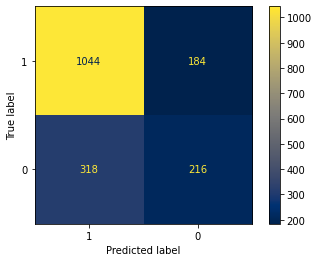

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_val, y_val,
                      values_format='d', cmap='cividis', 
                      display_labels=["1", "0"])

In [ ]:
# 평가 지표
print("정확도: %0.2f" % accuracy_score(y_val, val_pred))
print("정밀도: %0.2f" % precision_score(y_val, val_pred))
print("재현율: %0.2f" % recall_score(y_val, val_pred))
print("F1 스코어: %0.2f" % f1_score(y_val, val_pred))
print("ROC AUC: %0.2f" % roc_auc_score(y_val, val_pred))

NameError: ignored

In [ ]:
# 평가 지표
print("정확도: %0.2f" % accuracy_score(y_val, val_pred))
print("정밀도: %0.2f" % precision_score(y_val, val_pred))
print("재현율: %0.2f" % recall_score(y_val, val_pred))
print("F1 스코어: %0.2f" % f1_score(y_val, val_pred))
print("ROC AUC: %0.2f" % roc_auc_score(y_val, val_pred))

정확도: 0.69
정밀도: 0.47
재현율: 0.28
F1 스코어: 0.36
ROC AUC: 0.57


In [ ]:
# 평가 지표 - Accuracy
from sklearn.metrics import accuracy_score

print("정확도: %0.2f" % accuracy_score(y_val, val_pred))

정확도: 0.72


In [ ]:
# 평가 지표 - Precision
from sklearn.metrics import precision_score

print("정밀도: %0.2f" % precision_score(y_val, val_pred))

정밀도: 0.54


In [ ]:
# 평가 지표 - Recall
from sklearn.metrics import recall_score

print("재현율: %0.2f" % recall_score(y_val, val_pred))

재현율: 0.40


In [ ]:
# 평가 지표 - F1 score
from sklearn.metrics import f1_score

print("F1 스코어: %0.2f" % f1_score(y_val, val_pred))

F1 스코어: 0.46


In [ ]:
# 평가 지표 - ROC AUC
from sklearn.metrics import roc_auc_score

print("ROC AUC: %0.2f" % roc_auc_score(y_val, val_pred))

ROC AUC: 0.63


## Submission 파일 만들기

In [ ]:
submission = pd.read_csv('/content/MyDrive/MyDrive/membership/sample_submission.csv')
submission

,id,MEMBERSHIP_STATUS
0,8807,0
1,8808,1
2,8809,0
3,8810,0
4,8811,1
...,...,...
1550,10357,0
1551,10358,1
1552,10359,1
1553,10360,1


In [ ]:
preds = model.predict(X_test)
submission['MEMBERSHIP_STATUS'] = preds
submission

,id,MEMBERSHIP_STATUS
0,8807,0
1,8808,0
2,8809,0
3,8810,1
4,8811,0
...,...,...
1550,10357,0
1551,10358,0
1552,10359,0
1553,10360,0


In [ ]:
submission['MEMBERSHIP_STATUS'].value_counts() / submission.shape[0]

0    0.794212
1    0.205788
Name: MEMBERSHIP_STATUS, dtype: float64

In [ ]:
submission.to_csv('prediction_002.csv', index=False)

# Feature Engineering

## Feature Importance 

In [ ]:
# normalization 방법
feature_names = X_train.columns
feature_names

Index(['income', 'age', 'stard_date'], dtype='object')

In [ ]:
importances = model.feature_importances_
importances

array([0.22971877, 0.23018282, 0.54009841])

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(x=feature_names, y=importances, estimator=np.mean)
plt.title("Feature importances")
plt.ylabel("Mean decrease in impurity")
plt.show()

## Feature Scaling

In [ ]:
X_train.describe()

,income,age,stard_date
count,8.807000e+03,8807.000000,8.807000e+03
mean,1.375036e+06,46.766322,2.010835e+07
std,1.368975e+07,13.909048,1.727042e+04
min,9.996000e+03,0.000000,2.006091e+07
25%,3.999960e+05,37.000000,2.009123e+07
50%,6.999960e+05,46.000000,2.011011e+07
75%,1.375036e+06,57.000000,2.012123e+07
max,1.000000e+09,92.000000,2.013113e+07


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = X_train.copy()

scaler.fit(X_train)
X_train_scaled.loc[:, :] = scaler.transform(X_train)

X_train_scaled.head(2)

In [ ]:
X_test_scaled = X_test.copy()
X_test_scaled.loc[:, :] = scaler.transform(X_test)

X_test_scaled.head(2)

,income,age,stard_date
0,0.00099,0.445652,0.561376
1,0.00039,0.369565,0.418956


In [ ]:
X_tr, X_val, y_tr, y_val =  train_test_split(X_train_scaled, y_train, test_size=0.2, stratify=y_train, random_state=2021)

print("훈련 데이터셋: ", X_tr.shape, y_tr.shape)
print("검증 데이터셋: ", X_val.shape, y_val.shape)

훈련 데이터셋:  (7045, 3) (7045,)
검증 데이터셋:  (1762, 3) (1762,)


In [ ]:
model = RandomForestClassifier(random_state=2021)
model.fit(X_tr, y_tr)
val_pred = model.predict(X_val)

In [ ]:
# 평가 지표
print("정확도: %0.2f" % accuracy_score(y_val, val_pred))
print("정밀도: %0.2f" % precision_score(y_val, val_pred))
print("재현율: %0.2f" % recall_score(y_val, val_pred))
print("F1 스코어: %0.2f" % f1_score(y_val, val_pred))
print("ROC AUC: %0.2f" % roc_auc_score(y_val, val_pred))

정확도: 0.73
정밀도: 0.57
재현율: 0.44
F1 스코어: 0.49
ROC AUC: 0.65


In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(x=X_train.columns, y=model.feature_importances_, estimator=np.mean)
plt.title("Feature importances")
plt.ylabel("Mean decrease in impurity")
plt.show()

In [ ]:
preds = model.predict(X_test_scaled)
submission['MEMBERSHIP_STATUS'] = preds
submission.to_csv('prediction_002.csv', index=False)
submission

,id,MEMBERSHIP_STATUS
0,8807,0
1,8808,1
2,8809,0
3,8810,1
4,8811,0
...,...,...
1550,10357,0
1551,10358,1
1552,10359,0
1553,10360,0


In [ ]:
submission['MEMBERSHIP_STATUS'].value_counts() / submission.shape[0]

0    0.733762
1    0.266238
Name: MEMBERSHIP_STATUS, dtype: float64

# 모델 성능 개선하기

## 변수 선택 
Feature Importance 분석에 따라, 가장 낮는 married, job 열을 제외하고 분석

In [ ]:
X_train_scaled.head(2)

,income,age,stard_date
0,0.000440,0.293478,0.428897
1,0.001365,0.815217,0.998362


In [ ]:
X_train_scaled.columns

Index(['income', 'age', 'stard_date'], dtype='object')

In [ ]:
selected_features = ['term', 'fee', 'married', 'gender', 'income', 'job', 'package', 'age','family', 'stard_date', 'fee_log']
X_train_scaled = X_train_scaled.loc[:, selected_features]
X_test_scaled = X_test_scaled.loc[:, selected_features]

X_tr, X_val, y_tr, y_val =  train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=2021)
print("훈련 데이터셋: ", X_tr.shape, y_tr.shape)
print("검증 데이터셋: ", X_val.shape, y_val.shape)

KeyError: ignored

In [ ]:
model = RandomForestClassifier(random_state=2021)
model.fit(X_tr, y_tr)
val_pred = model.predict(X_val)

In [ ]:
# 평가 지표
print("정확도: %0.2f" % accuracy_score(y_val, val_pred))
print("정밀도: %0.2f" % precision_score(y_val, val_pred))
print("재현율: %0.2f" % recall_score(y_val, val_pred))
print("F1 스코어: %0.2f" % f1_score(y_val, val_pred))
print("ROC AUC: %0.2f" % roc_auc_score(y_val, val_pred))

정확도: 0.73
정밀도: 0.57
재현율: 0.44
F1 스코어: 0.49
ROC AUC: 0.65


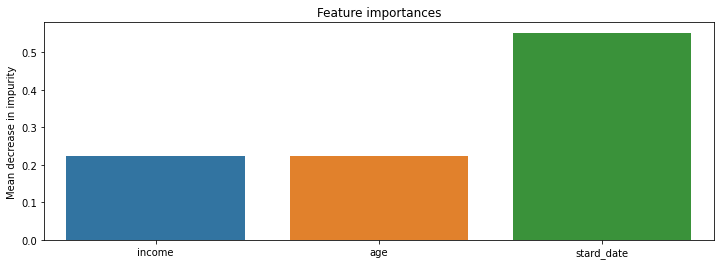

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(x=X_train_scaled.columns, y=model.feature_importances_, estimator=np.mean)
plt.title("Feature importances")
plt.ylabel("Mean decrease in impurity")
plt.show()

## 모델 파라미터 변경

In [ ]:
model = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=2021)
model.fit(X_tr, y_tr)
val_pred = model.predict(X_val)

In [ ]:
# 평가 지표
print("정확도: %0.2f" % accuracy_score(y_val, val_pred))
print("정밀도: %0.2f" % precision_score(y_val, val_pred))
print("재현율: %0.2f" % recall_score(y_val, val_pred))
print("F1 스코어: %0.2f" % f1_score(y_val, val_pred))
print("ROC AUC: %0.2f" % roc_auc_score(y_val, val_pred))

정확도: 0.73
정밀도: 0.57
재현율: 0.43
F1 스코어: 0.49
ROC AUC: 0.64


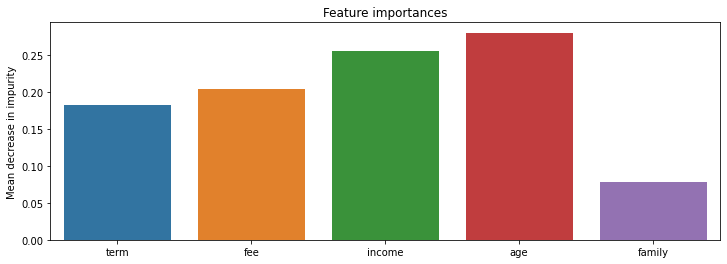

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(x=X_train_scaled.columns, y=model.feature_importances_, estimator=np.mean)
plt.title("Feature importances")
plt.ylabel("Mean decrease in impurity")
plt.show()

## SMOTE 업샘플링

In [ ]:
# !pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
len_train = len(X_train)
X_tr_smote, y_tr_smote = smote.fit_resample(X_tr, y_tr)

X_tr_smote.shape, X_tr.shape

((9816, 3), (7045, 3))

In [ ]:
model = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=2021)
model.fit(X_tr_smote, y_tr_smote)
val_pred = model.predict(X_val)

In [ ]:
# 평가 지표
print("정확도: %0.2f" % accuracy_score(y_val, val_pred))
print("정밀도: %0.2f" % precision_score(y_val, val_pred))
print("재현율: %0.2f" % recall_score(y_val, val_pred))
print("F1 스코어: %0.2f" % f1_score(y_val, val_pred))
print("ROC AUC: %0.2f" % roc_auc_score(y_val, val_pred))

정확도: 0.71
정밀도: 0.52
재현율: 0.56
F1 스코어: 0.54
ROC AUC: 0.67


In [ ]:
submission = pd.read_csv('/content/MyDrive/MyDrive/membership/sample_submission.csv')
submission

,id,MEMBERSHIP_STATUS
0,8807,0
1,8808,1
2,8809,0
3,8810,0
4,8811,1
...,...,...
1550,10357,0
1551,10358,1
1552,10359,1
1553,10360,1


In [ ]:
preds = model.predict(X_test)
submission['MEMBERSHIP_STATUS'] = preds
submission

,id,MEMBERSHIP_STATUS
0,8807,1
1,8808,1
2,8809,1
3,8810,1
4,8811,0
...,...,...
1550,10357,0
1551,10358,1
1552,10359,0
1553,10360,0


In [ ]:
submission['MEMBERSHIP_STATUS'].value_counts() / submission.shape[0]

0    0.595498
1    0.404502
Name: MEMBERSHIP_STATUS, dtype: float64

In [ ]:
submission.to_csv('prediction_009.csv', index=False)

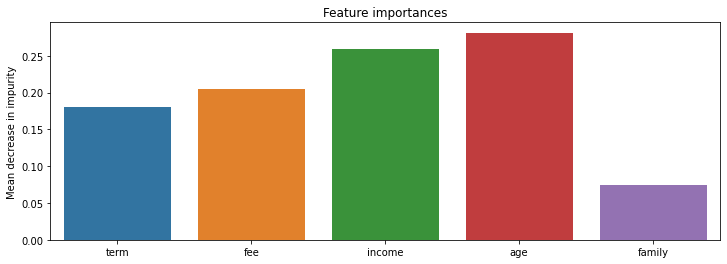

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(x=X_train_scaled.columns, y=model.feature_importances_, estimator=np.mean)
plt.title("Feature importances")
plt.ylabel("Mean decrease in impurity")
plt.show()

## One-Hot Encoding

In [ ]:
# Vehicle_Damage 
pd.get_dummies(X_train, columns = ['married'], drop_first=True)

KeyError: ignored

In [ ]:
X_data = X_train.append(X_test)
X_data = pd.get_dummies(X_data, columns = ['married', 'job'], drop_first=True)
X_data.head()

KeyError: ignored

In [ ]:
X_train = X_data.iloc[:len(X_train)]
X_test = X_data.iloc[len(X_train):]
X_test

,term,fee,income,age,family,married_1,married_2,married_3,married_4,job_2.0,job_3.0,job_4.0,job_5.0,job_6.0
0,12,100000.00,9.999960e+05,41,1,1,0,0,0,0,0,0,0,0
1,50,100000.00,3.999960e+05,34,2,1,0,0,0,0,0,0,0,0
2,12,100000.00,1.200000e+06,36,3,1,0,0,0,0,0,0,0,0
3,12,250000.00,7.999920e+05,60,0,0,0,1,0,1,0,0,0,0
4,17,200000.24,1.999992e+06,55,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,79,168500.24,1.375036e+06,62,0,0,0,1,0,0,0,0,0,1
1551,12,200000.00,1.500000e+06,41,3,1,0,0,0,0,0,0,0,0
1552,101,233154.49,2.460000e+06,33,0,0,0,1,0,0,0,0,0,0
1553,12,100000.00,3.999960e+05,38,1,1,0,0,0,0,0,0,0,0


In [ ]:
# stratify
X_tr, X_val, y_tr, y_val =  train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=2021)
print("훈련 데이터셋: ", X_tr.shape, y_tr.shape)
print("검증 데이터셋: ", X_val.shape, y_val.shape)

훈련 데이터셋:  (7045, 14) (7045,)
검증 데이터셋:  (1762, 14) (1762,)


In [ ]:
model = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=2021)
model.fit(X_tr, y_tr)
val_pred = model.predict(X_val)

In [ ]:
# 평가 지표
print("정확도: %0.2f" % accuracy_score(y_val, val_pred))
print("정밀도: %0.2f" % precision_score(y_val, val_pred))
print("재현율: %0.2f" % recall_score(y_val, val_pred))
print("F1 스코어: %0.2f" % f1_score(y_val, val_pred))
print("ROC AUC: %0.2f" % roc_auc_score(y_val, val_pred))

정확도: 0.68
정밀도: 0.51
재현율: 0.27
F1 스코어: 0.36
ROC AUC: 0.58


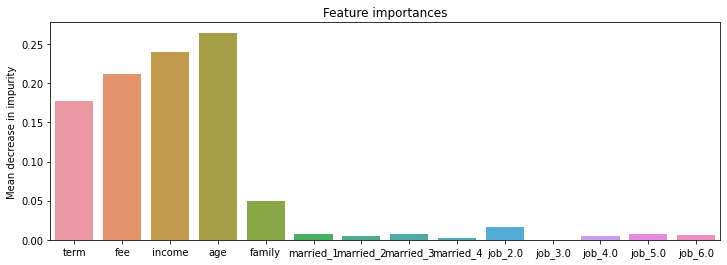

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(x=X_train.columns, y=model.feature_importances_, estimator=np.mean)
plt.title("Feature importances")
plt.ylabel("Mean decrease in impurity")
plt.show()

# 다른 알고리즘 적용

### XGBoost

In [ ]:
import xgboost as xgb

model2 = xgb.XGBClassifier(n_estimators=800, scale_pos_weight=5, random_state=2021)  # scale_pos_weight = total_majority_examples / total_minority_examples
model2.fit(X_tr, y_tr)
val_pred2 = model2.predict(X_val)

In [ ]:
model2.fit(X_tr, y_tr)

XGBClassifier(n_estimators=800, random_state=2021, scale_pos_weight=5)

In [ ]:
val_pred = model2.predict(X_val)
val_pred[:10]

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
y_val[:10].to_list()

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# 평가 지표
print("정확도: %0.2f" % accuracy_score(y_val, val_pred2))
print("정밀도: %0.2f" % precision_score(y_val, val_pred2))
print("재현율: %0.2f" % recall_score(y_val, val_pred2))
print("F1 스코어: %0.2f" % f1_score(y_val, val_pred2))
print("ROC AUC: %0.2f" % roc_auc_score(y_val, val_pred2))

정확도: 0.59
정밀도: 0.42
재현율: 0.89
F1 스코어: 0.57
ROC AUC: 0.68


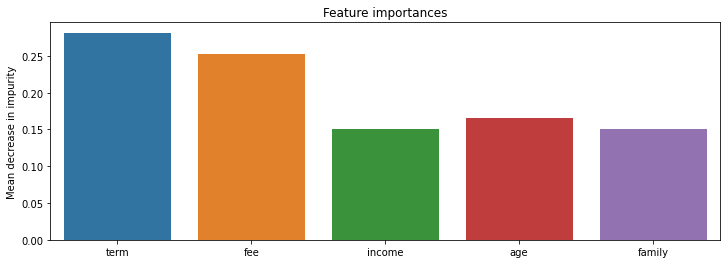

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(x=X_train.columns, y=model2.feature_importances_, estimator=np.mean)
plt.title("Feature importances")
plt.ylabel("Mean decrease in impurity")
plt.show()

In [ ]:
submission = pd.read_csv('/content/MyDrive/MyDrive/membership/sample_submission.csv')
submission

,id,MEMBERSHIP_STATUS
0,8807,0
1,8808,1
2,8809,0
3,8810,0
4,8811,1
...,...,...
1550,10357,0
1551,10358,1
1552,10359,1
1553,10360,1


In [ ]:
preds = model2.predict(X_test)
submission['MEMBERSHIP_STATUS'] = preds
submission

,id,MEMBERSHIP_STATUS
0,8807,0
1,8808,0
2,8809,0
3,8810,0
4,8811,0
...,...,...
1550,10357,0
1551,10358,0
1552,10359,0
1553,10360,0


In [ ]:
submission['MEMBERSHIP_STATUS'].value_counts() / submission.shape[0]

0    1.0
Name: MEMBERSHIP_STATUS, dtype: float64

In [ ]:
submission.to_csv('prediction_007.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2021)

### LightGBM

In [ ]:
import lightgbm as lgb
model3 = lgb.LGBMClassifier(n_estimators=15, scale_pos_weight=4, random_state=2021)
model3.fit(X_tr, y_tr)
val_pred3 = model3.predict(X_val)

In [ ]:
model3.fit(X_tr, y_tr)

LGBMClassifier(n_estimators=15, random_state=2021, scale_pos_weight=4)

In [ ]:
val_pred = model3.predict(X_val)
val_pred[:10]

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
y_val[:10].to_list()

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# 평가 지표
print("정확도: %0.2f" % accuracy_score(y_val, val_pred3))
print("정밀도: %0.2f" % precision_score(y_val, val_pred3))
print("재현율: %0.2f" % recall_score(y_val, val_pred3))
print("F1 스코어: %0.2f" % f1_score(y_val, val_pred3))
print("ROC AUC: %0.2f" % roc_auc_score(y_val, val_pred3))

정확도: 0.60
정밀도: 0.42
재현율: 0.90
F1 스코어: 0.58
ROC AUC: 0.69


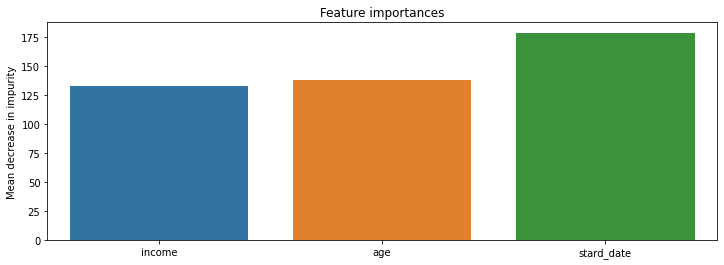

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(x=X_train.columns, y=model3.feature_importances_, estimator=np.mean)
plt.title("Feature importances")
plt.ylabel("Mean decrease in impurity")
plt.show()

In [ ]:
submission = pd.read_csv('/content/MyDrive/MyDrive/membership/sample_submission.csv')
submission

,id,MEMBERSHIP_STATUS
0,8807,0
1,8808,1
2,8809,0
3,8810,0
4,8811,1
...,...,...
1550,10357,0
1551,10358,1
1552,10359,1
1553,10360,1


In [ ]:
preds = model3.predict(X_test)
submission['MEMBERSHIP_STATUS'] = preds
submission

,id,MEMBERSHIP_STATUS
0,8807,1
1,8808,1
2,8809,1
3,8810,1
4,8811,0
...,...,...
1550,10357,0
1551,10358,1
1552,10359,1
1553,10360,1


In [ ]:
submission['MEMBERSHIP_STATUS'].value_counts() / submission.shape[0]

1    0.662379
0    0.337621
Name: MEMBERSHIP_STATUS, dtype: float64

In [ ]:
submission.to_csv('prediction_010.csv', index=False)

# K-fold 교차검증

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv_score = []
cv_model = lgb.LGBMClassifier(n_estimators=300, scale_pos_weight=10, random_state=2021)

idx_iter = 0
for train_idx , valid_idx in StratifiedKFold(n_splits=5, random_state=42, shuffle=True).split(X_train, y_train):  

    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[valid_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]

    #학습 및 예측 
    cv_model.fit(X_tr , y_tr)    
    y_pred = cv_model.predict(X_val)

    # 반복 시 마다 정확도 측정 
    idx_iter += 1
    score = f1_score(y_val, y_pred)

    print(f"{idx_iter}번째 Valid Fold의 F1 Score: {score}")

    cv_score.append(score)

1번째 Valid Fold의 F1 Score: 0.5107871720116619
2번째 Valid Fold의 F1 Score: 0.5167351732237229
3번째 Valid Fold의 F1 Score: 0.5180442374854481
4번째 Valid Fold의 F1 Score: 0.5280373831775701
5번째 Valid Fold의 F1 Score: 0.518562874251497


In [ ]:
# 평균 스코어
np.mean(cv_score)

0.51843336802998

# [실습]
고객 이탈 여부를 예측하는 모델을 훈련시키고 예측 결과를 시스템에 제출합니다. (합격 점수: F1스코어 0.52 이상)